In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Date_Fruit_Datasets.csv")

In [3]:
feature_cols = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

In [4]:
X = data[feature_cols].values  

In [5]:
k = 3

In [6]:
def initialize_centroids(X, k):
    random_indices = random.sample(range(len(X)), k)
    centroids = [X[i] for i in random_indices]
    return np.array(centroids)

In [7]:
max_iterations = 100

In [8]:
def euclidean_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))

centroids = initialize_centroids(X, k)

cluster_assignments = []

for iteration in range(max_iterations):
    clusters = [[] for _ in range(k)]
    
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        nearest_centroid_index = np.argmin(distances)
        clusters[nearest_centroid_index].append(point)
        cluster_assignments.append(nearest_centroid_index)
    
    new_centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            cluster_mean = np.mean(cluster, axis=0)
            new_centroids.append(cluster_mean)
        else:
            new_centroids.append(random.choice(X))
    
    if np.array_equal(centroids, new_centroids):
        break
    
    centroids = new_centroids

In [ ]:
for i, assignment in enumerate(cluster_assignments):
    print(f"Instance {i + 1} is assigned to Cluster {assignment + 1}")

Instance 1 is assigned to Cluster 1
Instance 2 is assigned to Cluster 1
Instance 3 is assigned to Cluster 2
Instance 4 is assigned to Cluster 3
Instance 5 is assigned to Cluster 1
Instance 6 is assigned to Cluster 1
Instance 7 is assigned to Cluster 2
Instance 8 is assigned to Cluster 1
Instance 9 is assigned to Cluster 2
Instance 10 is assigned to Cluster 2
Instance 11 is assigned to Cluster 1
Instance 12 is assigned to Cluster 1
Instance 13 is assigned to Cluster 1
Instance 14 is assigned to Cluster 1
Instance 15 is assigned to Cluster 2
Instance 16 is assigned to Cluster 1
Instance 17 is assigned to Cluster 1
Instance 18 is assigned to Cluster 3
Instance 19 is assigned to Cluster 1
Instance 20 is assigned to Cluster 1
Instance 21 is assigned to Cluster 1
Instance 22 is assigned to Cluster 1
Instance 23 is assigned to Cluster 3
Instance 24 is assigned to Cluster 3
Instance 25 is assigned to Cluster 3
Instance 26 is assigned to Cluster 3
Instance 27 is assigned to Cluster 1
Instance 2

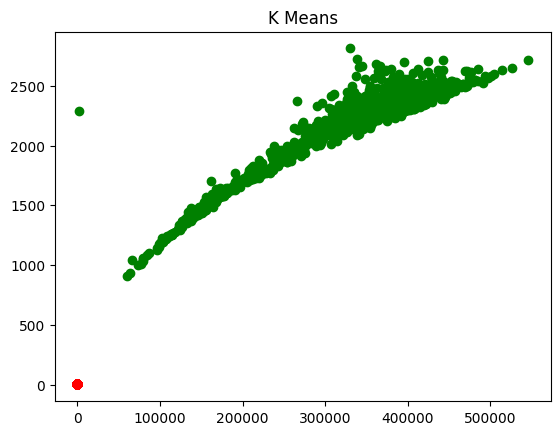

In [10]:
plt.scatter(data['AREA'],data['PERIMETER'],c='green')
plt.scatter(data['ECCENTRICITY'],data['EXTENT'],c='red')
plt.title('K Means')
plt.show()